# Plotting variograms using python

- toc: true
- categories: [Spatial Statistics]
- comments: true
- author: Hyunho Lee


## 1. What is Variogram?

A variogram is defined as the variance of the difference between field values at two locations.It depicts the spatial autocorrelation of the measured sample points. 

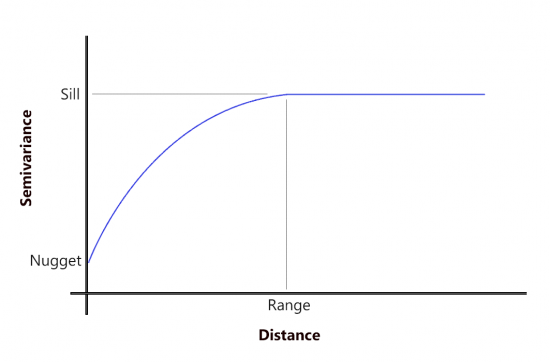

 - SILL: The value at which the model first flattens out.

 - RANGE: The distance at which the model first flattens out.

 - NUGGET: The value at which the semi-variogram (almost) intercepts the y-value.

 - reference: https://gisgeography.com/semi-variogram-nugget-range-sill/


## 2. Plotting variograms using Python

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

def vg_linear(d, tau2, sigma2, phi):
  if d > 0:
    return tau2 + sigma2 * d
  else:
    return 0

def vg_spherical(d, tau2, sigma2, phi):
  if d >= 1/phi:
    return tau2 + sigma2 * d
  elif d > 0 and d <= 1/phi:
    return tau2 + sigma2 * (3/2*phi*d - 1/2 * (phi*d) ** 3)
  else:
    return 0

def vg_exponential(d, tau2, sigma2, phi):
  if d > 0:
    return tau2 + sigma2 * (1 - np.exp(-phi * d))
  else:
    return 0

def vg_gaussian(d, tau2, sigma2, phi):
  if d > 0:
    return tau2 + sigma2 * (1 - np.exp(-(phi ** 2) * (d ** 2)))
  else:
    return 0

def vg_rational_quadratic(d, tau2, sigma2, phi):
  if d > 0:
    return tau2 + (sigma2 * (d ** 2)) / (phi + (d ** 2))
  else:
    return 0

def vg_wave(d, tau2, sigma2, phi):
  if d > 0:
    return tau2 + sigma2 * (1 - (np.sin(phi * d) / (phi * d)))
  else:
    return 0

def vg_matern_at_v_3_div_2(d, tau2, sigma2, phi):
  if d > 0:
    return tau2 + sigma2 * (1 - (1 + phi*d)*np.exp(-phi*d))
  else:
    return 0

def plot_variogram(d, tau, sigma, phi, vg_func, title):
  y = np.array([vg_func(di, tau, sigma, phi) for di in d])
  plt.plot(d, y)
  plt.title(title)
  plt.show()

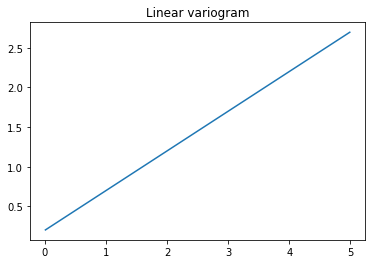

In [ ]:
# Linear
plot_variogram(np.arange(0.01, 5, 0.01), 0.2, 0.5, 0, vg_linear, 'Linear variogram')

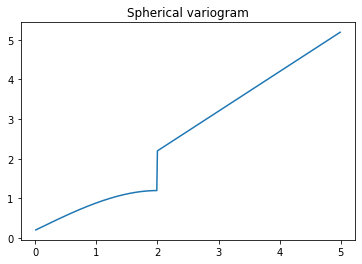

In [ ]:
# Spherical
plot_variogram(np.arange(0.01, 5, 0.01), 0.2, 1, 0.5, vg_spherical, 'Spherical variogram')

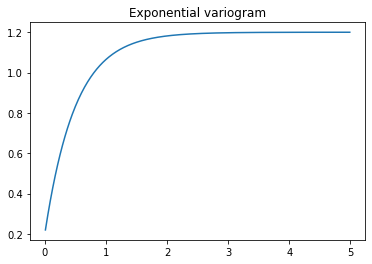

In [ ]:
# Exponential
plot_variogram(np.arange(0.01, 5, 0.01), 0.2, 1, 2, vg_exponential, 'Exponential variogram')

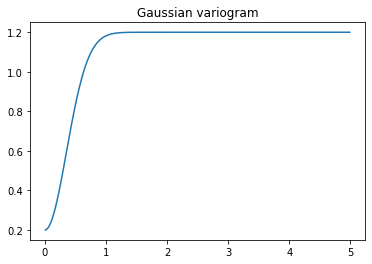

In [ ]:
# Gaussian
plot_variogram(np.arange(0.01, 5, 0.01), 0.2, 1, 2, vg_gaussian, 'Gaussian variogram')

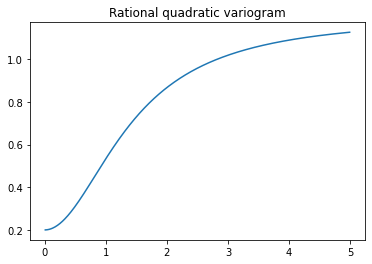

In [ ]:
# Rational quadratic
plot_variogram(np.arange(0.01, 5, 0.01), 0.2, 1, 2, vg_rational_quadratic, 'Rational quadratic variogram')

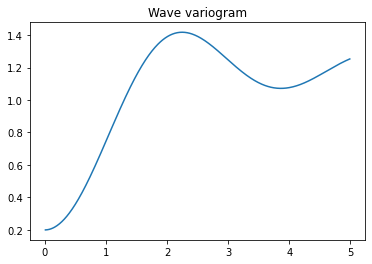

In [ ]:
# Wave
plot_variogram(np.arange(0.01, 5, 0.01), 0.2, 1, 2, vg_wave, 'Wave variogram')

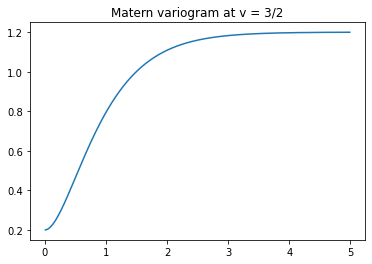

In [ ]:
# Matern
plot_variogram(np.arange(0.01, 5, 0.01), 0.2, 1, 2, vg_matern_at_v_3_div_2, 'Matern variogram at v = 3/2')